In [192]:
file = "/Subs/en/2018/5463162/6950023.xml"

data = open(file, encoding="utf-8").read()

In [193]:
import xml.dom.minidom
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pylab as plt

doc = xml.dom.minidom.parse(file)

In [194]:
movieText = ""

for item in doc.getElementsByTagName("s"):
    for child in item.childNodes:
        if child.nodeName == "#text" and len(re.findall("\w", child.nodeValue)) > 1:
            movieText += child.nodeValue

In [195]:
movieText = re.sub("\n\s+", " ", movieText)
movieText = re.sub("\n", "", movieText)

pattern = r'''(?x)(?:[A-Z]\.)+ | \w+(?:-\w+)*  | '''
tokens = nltk.regexp_tokenize(movieText, pattern)

#Remove non alphanumericbetic characters
tokens = [w for w in tokens if re.search(r'\w', w)]

#Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
tokens = [w for w in tokens if w.lower() not in stopwords]

#Remove numbers 
tokens = [w for w in tokens if not re.search(r'\d', w)]

#Lower case
tokens = [t.lower() for t in tokens]

tokens = list(set(tokens))
tokens = [item for item in tokens if item.isalpha()]

In [196]:
def tf_calculator(l):
    tf = {}
    
    for item in l:
        if item in tf:
            tf[item] += 1
        else:
            tf[item] = 1
    
    return tf

In [197]:
tokens_tf = tf_calculator(tokens)

In [198]:
idf = dict()

for word in set(tokens):
    idf[word] = 1

In [199]:
tokens_tfidf = dict()

for word in tokens_tf:
    tokens_tfidf[word] = tokens_tf[word] * idf[word]

In [200]:
wordcloud = WordCloud(width=1000, height=1000, background_color="#EEEEEE").generate_from_frequencies(tokens_tfidf)

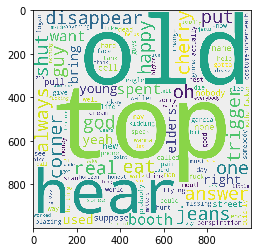

In [201]:
plt.imshow(wordcloud)